In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [55]:
data  = pd.read_csv('../singlephotoncsv/interference.csv')

In [56]:
data = data.drop('relative Glass Shift', axis=1)

In [57]:
data= data.sort_values(by = 'Glass Shift')
data

,Glass Shift,Glass Shift.1,Coincidences,s1
123,-0.95,12.84,853,45000
122,-0.93,12.86,893,45000
121,-0.91,12.88,884,46000
120,-0.89,12.90,873,46000
119,-0.87,12.92,889,46000
...,...,...,...,...
52,0.92,14.71,901,46000
53,0.94,14.73,919,47000
54,0.96,14.75,902,47000
55,0.98,14.77,905,47000


In [58]:
x = data['Glass Shift']
y = data['Coincidences']

In [59]:
shift_down= max(y)/2
y -= shift_down

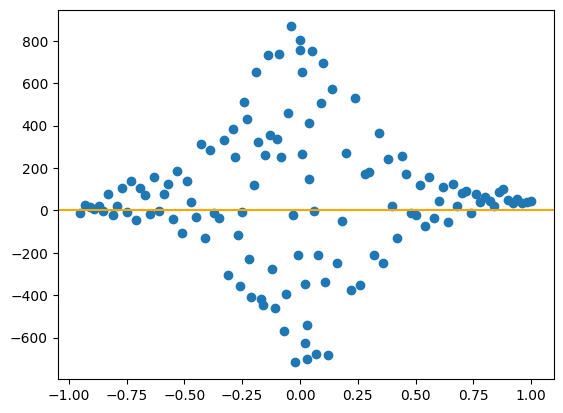

In [60]:
plt.scatter(x, y )
plt.axhline(0, color='orange')
# plt.xlim(0,.1)

In [61]:
def gaussian_sin(x, amp_gauss, mu, sigma, freq, phase, offset):
    gaussian = amp_gauss * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    sinusoid =  np.sin(freq* x + phase)
    return gaussian * sinusoid + offset

def sin(x,freq, phase ):
    sinusoid =  np.sin(freq* x + phase)
    return sinusoid


def gaussian(x, amp_gauss, mu, sigma, offset):
    gaussian = amp_gauss * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    return gaussian + offset

In [62]:

# Initial guess for the parameters
initial_guess = [800,0, 0.25, 100, -.02/((2*np.pi)/0.5), 100]  # [amp_gauss, mu, sigma, amp_sin, freq, phase, offset]


In [63]:
# Perform the curve fitting
params, covariance = curve_fit(gaussian_sin, x, y, p0=initial_guess)

In [64]:
# Get the fitted values
xlin = np.linspace(-1,1, 5000)
fitted_y = gaussian_sin(xlin, *params)
initial_y = gaussian_sin(xlin, *initial_guess)
eval_gaussian = gaussian(xlin, -1*params[0], *params[1:3], params[-1])

In [65]:
conv_factor = 0.017839076356638374 

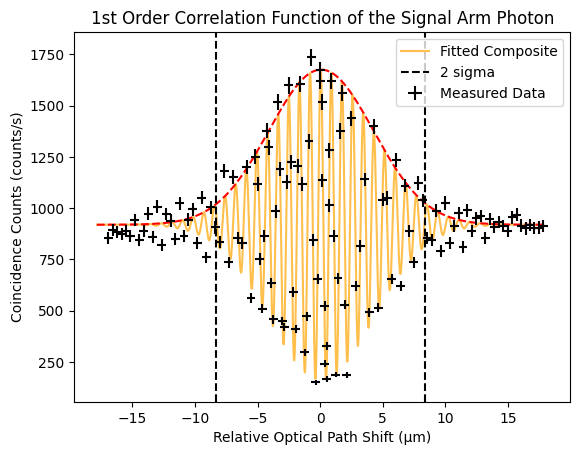

In [66]:


# Plot the data and the fit
plt.plot(xlin  * conv_factor *1e3, fitted_y+shift_down, label='Fitted Composite', color='orange', alpha = 0.7)
plt.plot(xlin * conv_factor*1e3, eval_gaussian+shift_down, color = 'red', linestyle = 'dashed')
plt.errorbar(x = x * conv_factor *1e3 , y = y+shift_down, yerr = np.sqrt(y+shift_down), xerr = [20* conv_factor]*len(x), label='Measured Data', color='black', fmt ='none')
# plt.plot(xlin, initial_y, label='Initial Gaussian + Sinusoid', color='orange')
# plt.xlim(0, 0.1)
plt.axvline(2*params[2]*conv_factor*1e3, linestyle = 'dashed', color = 'black', label ='2 sigma')
plt.axvline(-2*params[2]*conv_factor*1e3,linestyle = 'dashed', color = 'black')
plt.xlabel('Relative Optical Path Shift (μm)')
plt.ylabel('Coincidence Counts (counts/s)')
plt.title('1st Order Correlation Function of the Signal Arm Photon')

# plt.xlim(10,15)
plt.legend()
plt.show()

# Print the fitting parameters

In [67]:
uncertainties = np.sqrt(np.diag(covariance))
uncertainties

array([2.91710263e+01, 1.32419426e-02, 1.34082328e-02, 2.40906182e-01,
       3.29006776e-02, 1.00585483e+01])

In [68]:
sigma2 = 2*params[2]*conv_factor*1e3
sigma22_unc = 2*uncertainties[2]*conv_factor*1e3
equip_unc = 2*20*conv_factor
print(sigma2*2, sigma22_unc, equip_unc*2)

-16.721537799250843 0.4783809774808104 1.4271261085310698


In [69]:
print('amp_gauss, mu, sigma, freq, phase, offset')
print(  params,'\n', uncertainties)


amp_gauss, mu, sigma, freq, phase, offset
[-7.56537997e+02  4.45126855e-03 -2.34338615e-01  1.31908288e+02
 -1.89743577e+00  5.15877119e+01] 
 [2.91710263e+01 1.32419426e-02 1.34082328e-02 2.40906182e-01
 3.29006776e-02 1.00585483e+01]


In [70]:
# # try with exp and cutoff
# cut_left = np.abs(x).argmin()
# x = x[cut_left:]
# y = y[cut_left:]

In [71]:
# def exp(x, amp_exp, decay_rate):
#     exponential = amp_exp * np.exp(-decay_rate * x)  # Exponential decay
#     return exponential 

In [72]:
# freq= 125
# phase = 1.5

In [73]:
# xlin = np.linspace(0, 1, 5000)
# y_exp_guess = exp(xlin, 800 , 2.7 )
# y_sin_guess = sin(xlin, freq, phase)

# # Initial guess for the parameters
# initial_guess = [800, 2.7,  freq, phase, 100]  # [amp_gauss, decay, freq, phase, offset]

In [74]:
# def exp_composite(x, amp_exp , decay, freq, phase, offset):
#     sinus = sin(x, freq, phase)
#     expe  = exp(x, amp_exp, decay)
#     return np.multiply(sinus, expe) + offset

In [75]:
# # Perform the curve fitting
# params, covariance = curve_fit(exp_composite, x, y, p0=initial_guess)




In [76]:
# y_fitted = exp_composite(xlin, *params)

In [77]:
# plt.scatter(x,y,s=20,marker ='x')
# # plt.plot(xlin, y_exp_guess)
# # plt.plot(xlin, 800*y_sin_guess)
# plt.plot(xlin, y_fitted)
# # plt.xlim(0, 0.2)
# plt.title('Fit with exponential Decay')
# plt.xlabel('Relative Shift (millimiters)')

In [78]:
# print(params)

In [79]:
# ## right cutof
# # try with exp and cutoff
# cut_left = np.abs(x).argmin()
# x = x[cut_left:]
# y = y[cut_left:]
# def exp(x, amp_exp, decay_rate):
#     exponential = amp_exp * np.exp(-decay_rate * x)  # Exponential decay
#     return exponential 
# freq= 125
# phase = 1.5
# xlin = np.linspace(0, 1, 5000)
# y_exp_guess = exp(xlin, 800 , 2.7 )
# y_sin_guess = sin(xlin, freq, phase)

# # Initial guess for the parameters
# initial_guess = [800, 2.7,  freq, phase, 100]  # [amp_gauss, decay, freq, phase, offset]
# def exp_composite(x, amp_exp , decay, freq, phase, offset):
#     sinus = sin(x, freq, phase)
#     expe  = exp(x, amp_exp, decay)
#     return np.multiply(sinus, expe) + offset
# # Perform the curve fitting
# params, covariance = curve_fit(exp_composite, x, y, p0=initial_guess)



# y_fitted = exp_composite(xlin, *params)
# plt.scatter(x,y,s=20,marker ='x')
# # plt.plot(xlin, y_exp_guess)
# # plt.plot(xlin, 800*y_sin_guess)
# plt.plot(xlin, y_fitted)
# # plt.xlim(0, 0.2)